In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_epl = pd.read_csv('results.csv',encoding='windows-1252')
df_epl

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0


# Các câu hỏi cần phải trả lời: 
* Được thi đấu trên sân nhà có phải là 1 lợi thế? Và nếu có lợi thế thì lợi thế đó được thể hiện như thế nào?
* Chơi tấn công hay chơi phòng thủ sẽ đem lại kết quả có lợi cho đội bóng của bạn?

# Câu hỏi thứ nhất: Được thi đấu trên sân nhà có phải là lợi thế hay không?

In [3]:
df_epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [4]:
df_home_field_advantage = df_epl.copy()

In [5]:
x = dict(df_home_field_advantage['FTR'].value_counts())
x

{'H': 5088, 'A': 3161, 'D': 2864}

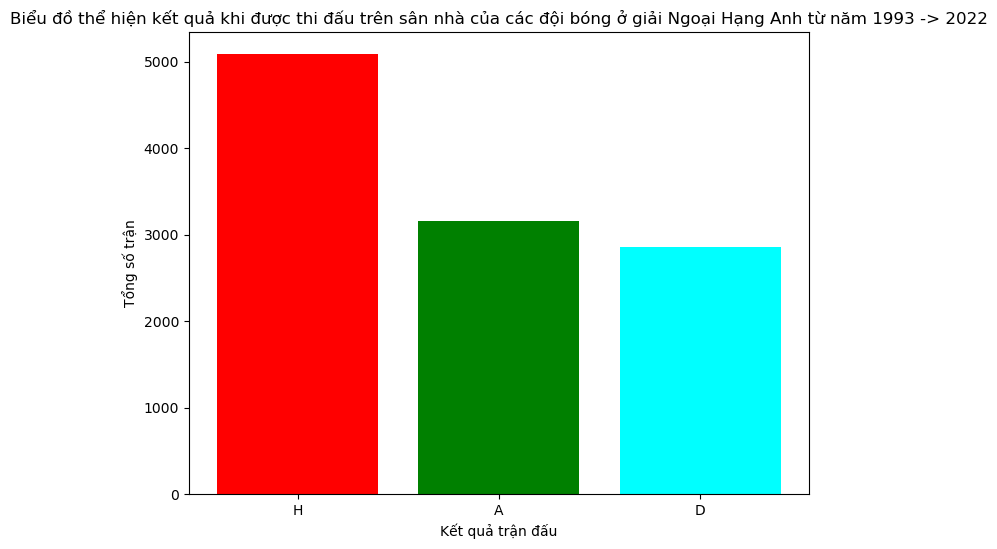

In [6]:
fig = plt.figure(figsize=(8,6))
plt.bar(list(x.keys()) , list(x.values()) , color=['red' , 'green' , 'cyan'])
plt.xlabel("Kết quả trận đấu")
plt.ylabel("Tổng số trận")
plt.title("Biểu đồ thể hiện kết quả khi được thi đấu trên sân nhà của các đội bóng ở giải Ngoại Hạng Anh từ năm 1993 -> 2022")
plt.show();

# Như vậy ta có thể thấy , số lượng trận thắng trên sân nhà là áp đảo , vì thế mà ta có thể coi sân nhà là 1 lợi thế. Vậy lợi thế của nó ra sao?

In [7]:
point_df_home = df_home_field_advantage.groupby('HomeTeam')['FTR'].value_counts().unstack(fill_value = 0).reset_index()
point_df_home # H là đội chủ nhà thắng | A là đội khách thắng | D là hòa

FTR,HomeTeam,A,D,H
0,Arsenal,70,125,357
1,Aston Villa,156,144,194
2,Barnsley,8,4,7
3,Birmingham,37,46,50
4,Blackburn,90,81,156
5,Blackpool,9,5,5
6,Bolton,79,75,93
7,Bournemouth,36,25,34
8,Bradford,13,15,10
9,Brentford,8,2,6


In [8]:
number_win_for_HomeTeam = point_df_home['H'].sum()
number_draw_for_HomeTeam = point_df_home['D'].sum()

In [9]:
point_df_away = df_home_field_advantage.groupby('AwayTeam')['FTR'].value_counts().unstack(fill_value = 0).reset_index()
point_df_away # H là đội chủ nhà thắng | A là đội khách thắng | D là hòa

FTR,AwayTeam,A,D,H
0,Arsenal,242,148,160
1,Aston Villa,137,138,220
2,Barnsley,3,1,15
3,Birmingham,23,36,74
4,Blackburn,86,92,149
5,Blackpool,5,4,10
6,Bolton,56,53,138
7,Bournemouth,22,18,55
8,Bradford,4,5,29
9,Brentford,4,4,8


In [10]:
number_win_for_AwayTeam = point_df_away['A'].sum()
number_draw_for_AwayTeam = point_df_away['D'].sum()

In [11]:
total_points_home = number_win_for_HomeTeam * 3 + number_draw_for_HomeTeam 
total_points_away = number_win_for_AwayTeam * 3 +  number_draw_for_AwayTeam

In [12]:
dict_point = {'Home':total_points_home , 'Away':total_points_away}
dict_point

{'Home': 18128, 'Away': 12347}

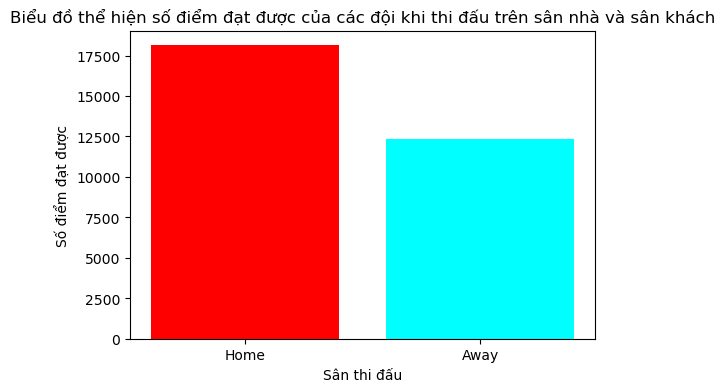

In [13]:
fig = plt.figure(figsize=(6,4))
plt.bar(dict_point.keys() , dict_point.values() , color=['red' , 'cyan'])
plt.xlabel("Sân thi đấu")
plt.ylabel("Số điểm đạt được")
plt.title("Biểu đồ thể hiện số điểm đạt được của các đội khi thi đấu trên sân nhà và sân khách")
plt.show();

In [14]:
# Xem qua từng mùa giải thì lợi thế sân nhà sẽ được thể hiện ra sao?
season_h = df_home_field_advantage.groupby(['Season' , 'HomeTeam' , 'FTR'])['FTR'].count().unstack(fill_value = 0).reset_index()
season_h['Points'] = season_h['H'] * 3 + season_h['D']
temp_h = season_h.groupby('Season').sum()['Points'].reset_index()
temp_h

,Season,Points
0,1993-94,718
1,1994-95,749
2,1995-96,656
3,1996-97,605
4,1997-98,647
5,1998-99,622
6,1999-00,653
7,2000-01,653
8,2001-02,596
9,2002-03,651


In [15]:
season_a = df_home_field_advantage.groupby(['Season' , 'AwayTeam' , 'FTR'])['FTR'].count().unstack(fill_value = 0).reset_index()
season_a['Points'] = season_a['A'] * 3 + season_a['D']
temp_a = season_a.groupby('Season').sum()['Points'].reset_index()
temp_a

,Season,Points
0,1993-94,526
1,1994-95,503
2,1995-96,386
3,1996-97,416
4,1997-98,398
5,1998-99,403
6,1999-00,395
7,2000-01,386
8,2001-02,443
9,2002-03,399


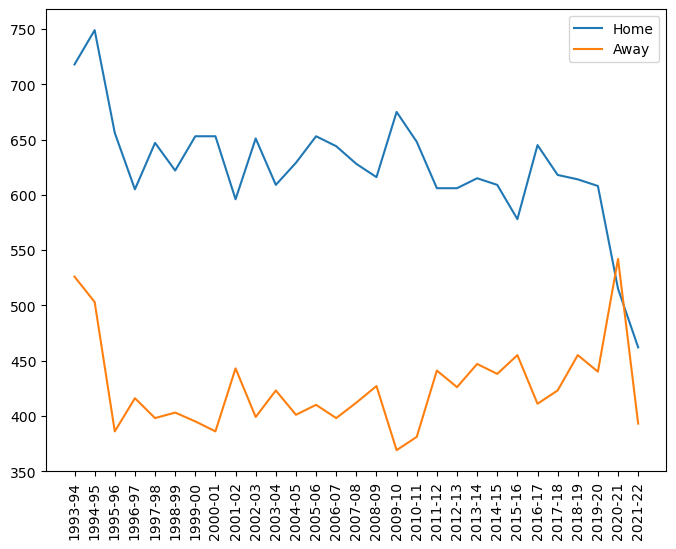

In [16]:
fig = plt.figure(figsize=(8,6))
plt.plot(temp_h['Season'] , temp_h['Points'] , label = "Home")
plt.plot(temp_a['Season'] , temp_a['Points'] , label = "Away")
plt.xticks(rotation=90)
plt.legend()
plt.show();

In [17]:
# Thành tích của các đội chủ nhà qua các năm
df_rate_hometeam_win = df_home_field_advantage.groupby('Season')['FTR'].value_counts().unstack(fill_value=0).reset_index()
df_rate_hometeam_win['rate'] = df_rate_hometeam_win['H'] / (df_rate_hometeam_win['H'] + df_rate_hometeam_win['D'] + df_rate_hometeam_win['A']) * 100
df_rate_hometeam_win

FTR,Season,A,D,H,rate
0,1993-94,128,142,192,41.558442
1,1994-95,123,134,205,44.372294
2,1995-96,96,98,186,48.947368
3,1996-97,99,119,162,42.631579
4,1997-98,101,95,184,48.421053
5,1998-99,96,115,169,44.473684
6,1999-00,101,92,187,49.210526
7,2000-01,95,101,184,48.421053
8,2001-02,114,101,165,43.421053
9,2002-03,103,90,187,49.210526


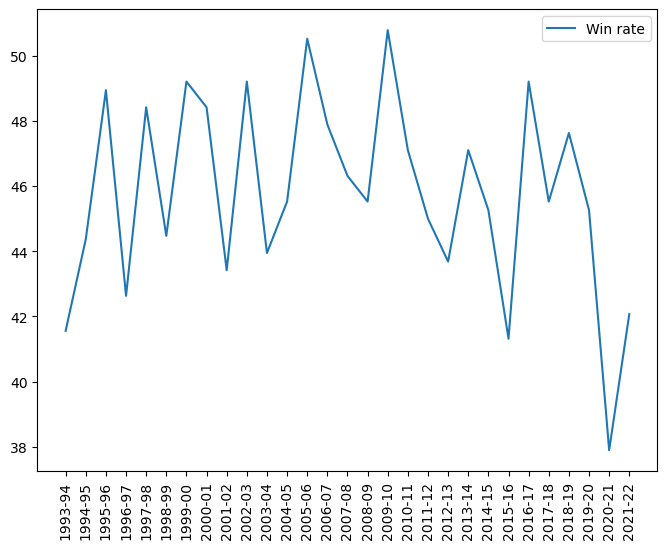

In [18]:
fig = plt.figure(figsize=(8,6))
plt.plot(df_rate_hometeam_win['Season'] , df_rate_hometeam_win['rate'] , label = "Win rate")
plt.legend()
plt.xticks(rotation = 90)
plt.show();

In [19]:
# Liệu khi thi đấu ở sân nhà thì các cầu thủ có dễ thăng hoa hơn hay không?
df_goals_home = df_home_field_advantage.groupby('HomeTeam')['FTHG'].sum().reset_index()
total_goals_home = df_goals_home['FTHG'].sum()

In [20]:
df_goals_away = df_home_field_advantage.groupby('AwayTeam')['FTAG'].sum().reset_index()
total_goals_away = df_goals_away['FTAG'].sum()

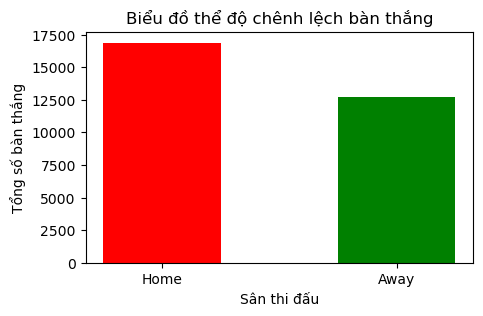

In [21]:
dict_goal = {'Home':total_goals_home , 'Away':total_goals_away}
fig = plt.figure(figsize=(5,3))
plt.bar(dict_goal.keys(),dict_goal.values(),color=['red','green'],width=0.5)
plt.title('Biểu đồ thể độ chênh lệch bàn thắng')
plt.xlabel('Sân thi đấu')
plt.ylabel('Tổng số bàn thắng')
plt.show();

# Câu hỏi 2: Chơi tấn công tốt hơn hay chơi phòng thủ tốt hơn?

In [22]:
# Tính số bàn thắng ghi được của đội chủ nhà và đội khách
df_goals = df_epl.copy()
df_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [23]:
goals_home = df_goals.groupby('HomeTeam')['FTHG'].sum().reset_index()
goals_home

,HomeTeam,FTHG
0,Arsenal,1119
1,Aston Villa,643
2,Barnsley,25
3,Birmingham,162
4,Blackburn,507
5,Blackpool,30
6,Bolton,319
7,Bournemouth,136
8,Bradford,46
9,Brentford,18


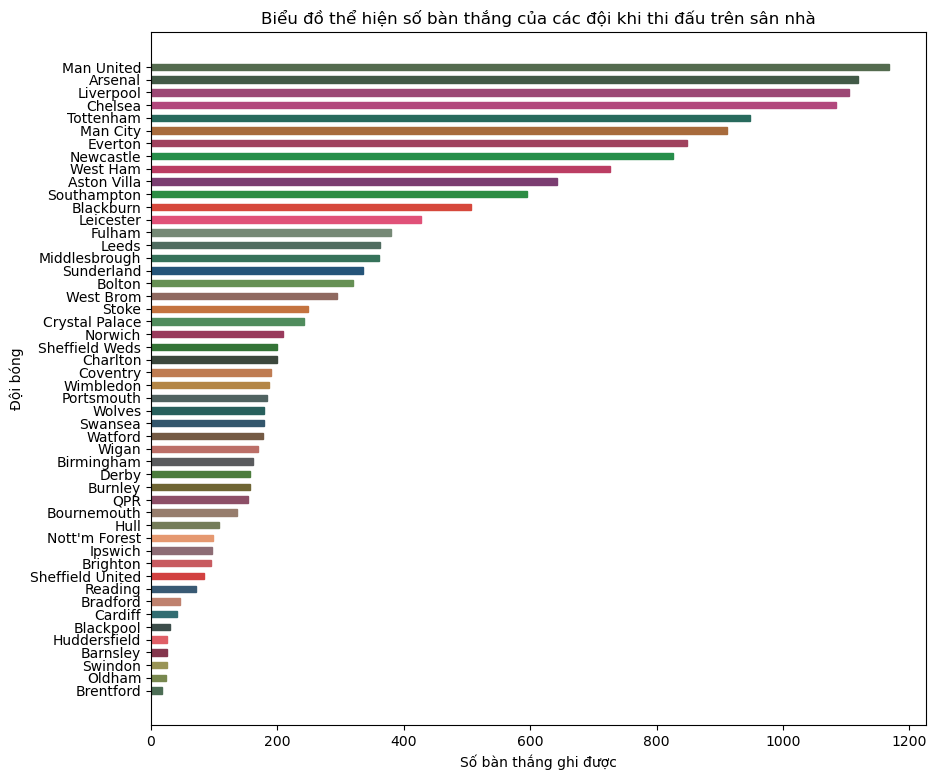

In [24]:
import random as rd
# Biểu đồ thể hiện số lượng bàn thắng được ghi bởi mỗi đội khi thi đấu trên sân nhà
fig = plt.figure(figsize=(10,9))
ax = plt.subplot(111)
goals_home.sort_values('FTHG',inplace=True)
ele = ax.barh(goals_home['HomeTeam'] , goals_home['FTHG'] , height=0.5)
for i in range(len(goals_home)):
    r = rd.uniform(0.1 , 0.9)
    g = rd.uniform(0.2 , 0.6)
    b = rd.uniform(0.2 , 0.5)
    ele[i].set_color((r,g,b))
ax.set_xlabel("Số bàn thắng ghi được")  
ax.set_ylabel("Đội bóng")
ax.set_title("Biểu đồ thể hiện số bàn thắng của các đội khi thi đấu trên sân nhà")
plt.show();

In [25]:
# Tính số điểm đạt được của các đội bóng khi đá sân nhà
df_points_h = df_epl.groupby('HomeTeam')['FTR'].value_counts().unstack(fill_value = 0).reset_index()
df_points_h['Điểm sân nhà'] = df_points_h['H'] * 3 + df_points_h['D']
df_points_h

FTR,HomeTeam,A,D,H,Điểm sân nhà
0,Arsenal,70,125,357,1196
1,Aston Villa,156,144,194,726
2,Barnsley,8,4,7,25
3,Birmingham,37,46,50,196
4,Blackburn,90,81,156,549
5,Blackpool,9,5,5,20
6,Bolton,79,75,93,354
7,Bournemouth,36,25,34,127
8,Bradford,13,15,10,45
9,Brentford,8,2,6,20


In [26]:
# Tính số điểm đạt được của các đội bóng khi đá sân khách
df_points_a = df_epl.groupby('AwayTeam')['FTR'].value_counts().unstack(fill_value = 0).reset_index()
df_points_a['Điểm sân khách'] = df_points_a['A'] * 3 + df_points_a['D']
df_points_a

FTR,AwayTeam,A,D,H,Điểm sân khách
0,Arsenal,242,148,160,874
1,Aston Villa,137,138,220,549
2,Barnsley,3,1,15,10
3,Birmingham,23,36,74,105
4,Blackburn,86,92,149,350
5,Blackpool,5,4,10,19
6,Bolton,56,53,138,221
7,Bournemouth,22,18,55,84
8,Bradford,4,5,29,17
9,Brentford,4,4,8,16


In [27]:
df_points_total = pd.concat([df_points_a, df_points_h],axis=1)
df_points_total['Điểm'] = df_points_a['Điểm sân khách'] + df_points_h['Điểm sân nhà']
df_points_total_1 = df_points_total[['HomeTeam' , 'Điểm']]
df_points_total_1 = df_points_total_1.rename(columns={'HomeTeam':'Đội'})
df_points_total_1 = df_points_total_1.sort_values('Điểm',ascending=False)
df_points_total_1

FTR,Đội,Điểm
27,Man United,2275
0,Arsenal,2070
14,Chelsea,2070
25,Liverpool,2031
43,Tottenham,1714
26,Man City,1553
18,Everton,1510
29,Newcastle,1395
1,Aston Villa,1275
46,West Ham,1253


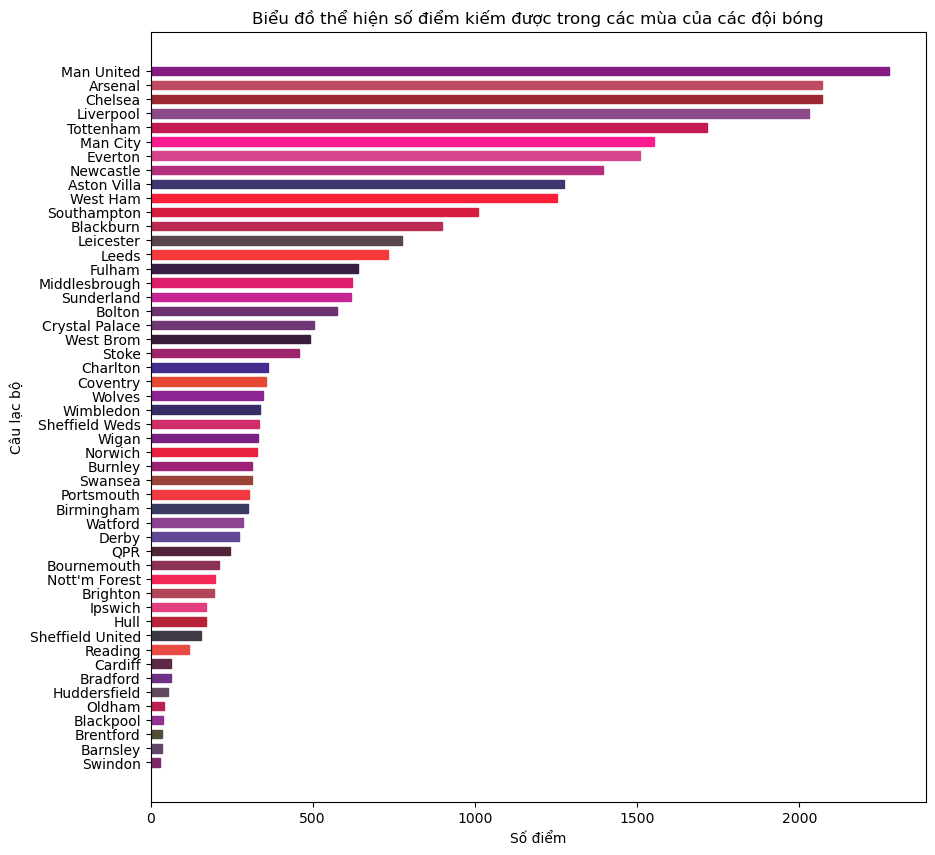

In [28]:
import random as rd
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(111)
df_points_total_1.sort_values('Điểm',inplace=True)
ret = ax1.barh(df_points_total_1['Đội'],df_points_total_1['Điểm'],height=0.6)
# setting different bar color
for i in range(len(df_points_total_1['Đội'])):
    r = rd.uniform(0.2,1)
    g= rd.uniform(0.1,0.3)
    b = rd.uniform(0.2,0.6)
    rgb = (r,g,b)
    ret[i].set_color(rgb)
ax1.set_xlabel("Số điểm")
ax1.set_ylabel("Câu lạc bộ")
ax1.set_title("Biểu đồ thể hiện số điểm kiếm được trong các mùa của các đội bóng")
plt.show();

In [29]:
# Xem liệu khi ghi được bàn và bị thủng lưới thì các đội sẽ kiếm được điểm như thế nào
df_compare = df_epl.copy()
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11113 entries, 0 to 11112
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    11113 non-null  object 
 1   DateTime  11113 non-null  object 
 2   HomeTeam  11113 non-null  object 
 3   AwayTeam  11113 non-null  object 
 4   FTHG      11113 non-null  int64  
 5   FTAG      11113 non-null  int64  
 6   FTR       11113 non-null  object 
 7   HTHG      10189 non-null  float64
 8   HTAG      10189 non-null  float64
 9   HTR       10189 non-null  object 
 10  Referee   8289 non-null   object 
 11  HS        8289 non-null   float64
 12  AS        8289 non-null   float64
 13  HST       8289 non-null   float64
 14  AST       8289 non-null   float64
 15  HC        8289 non-null   float64
 16  AC        8289 non-null   float64
 17  HF        8289 non-null   float64
 18  AF        8289 non-null   float64
 19  HY        8289 non-null   float64
 20  AY        8289 non-null   fl

In [30]:
# xem xem số bàn trong 1 trận khi đá ở sân nhà là bao nhiêu
df_compare['FTHG'].value_counts()

1    3587
2    2700
0    2625
3    1351
4     562
5     193
6      59
7      26
8       7
9       3
Name: FTHG, dtype: int64

In [31]:
# Xem xem số bàn trong 1 trận khi đá trên sân khách là bao nhiêu
df_compare['FTAG'].value_counts()

1    3840
0    3809
2    2111
3     940
4     303
5      77
6      28
7       3
8       1
9       1
Name: FTAG, dtype: int64

In [32]:
x = df_compare[df_compare['FTHG'] == 9]
x

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
787,1994-95,1995-03-04T00:00:00Z,Man United,Ipswich,9,0,H,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6370,2009-10,2009-11-22T00:00:00Z,Tottenham,Wigan,9,1,H,1.0,0.0,H,...,16.0,5.0,10.0,5.0,9.0,11.0,1.0,0.0,0.0,0.0
10631,2020-21,2021-02-02T20:15:00Z,Man United,Southampton,9,0,H,4.0,0.0,H,...,14.0,1.0,5.0,3.0,11.0,6.0,2.0,3.0,0.0,2.0


In [33]:
# như vậy , số bàn thắng ở mỗi trận rải đều từ 0 -> 9
table_score_points = pd.DataFrame(index=range(10),columns=['Bàn thắng' , 'Điểm thắng' , 'Bàn thua' , 'Điểm thua'])
table_score_points['Bàn thắng'] = range(0,10)
table_score_points['Bàn thua'] = range(0,10)
table_score_points

,Bàn thắng,Điểm thắng,Bàn thua,Điểm thua
0,0,NaN,0,NaN
1,1,NaN,1,NaN
2,2,NaN,2,NaN
3,3,NaN,3,NaN
4,4,NaN,4,NaN
5,5,NaN,5,NaN
6,6,NaN,6,NaN
7,7,NaN,7,NaN
8,8,NaN,8,NaN
9,9,NaN,9,NaN


In [34]:
# Bàn thắng
for i in range(10):
    # Điểm sân nhà
    home_score = df_compare[df_compare['FTHG'] == i]
    home_score['Điểm sân nhà'] = np.select([home_score['FTR'] == 'H' , home_score['FTR'] == 'D' , home_score['FTR'] == 'A'],[3,1,0])
    total_points_home = sum(home_score['Điểm sân nhà'])
    # Điểm sân khách
    away_score = df_compare[df_compare['FTAG'] == i]
    away_score['Điểm sân khách'] = np.select([away_score['FTR'] == 'A' , away_score['FTR'] == 'D' , away_score['FTR'] == 'H'],[3,1,0])
    total_points_away = sum(away_score['Điểm sân khách'])
    # Điểm trung bình kiếm được
    total_points = total_points_home + total_points_away
    avg_points = total_points / (len(home_score) + len(away_score))
    # Gán giá trị vào bảng
    table_score_points.iloc[i,1] = avg_points

# Bàn thua
for i in range(10):
    # Điểm & Bàn trên sân nhà
    home_received = df_compare[df_compare['FTAG'] == i]
    home_received['Điểm sân nhà'] = np.select([home_received['FTR'] == 'H' , home_received['FTR'] == 'D' , home_received['FTR'] == 'A'],[3,1,0])
    total_points_home = home_received['Điểm sân nhà'].sum()
    # Điểm & Bàn trên sân khách
    away_received = df_compare[df_compare['FTHG'] == i]
    away_received['Điểm sân khách'] = np.select([away_received['FTR'] == 'A' , away_received['FTR'] == 'D' , away_received['FTR'] == 'H'],[3,1,0])
    total_points_away = away_received['Điểm sân khách'].sum()
    # Điểm trung bình kiếm được
    total_points = total_points_home + total_points_away
    avg_points = total_points / (len(home_received) + len(away_received))
    # Gán giá trị vào bảng
    table_score_points.iloc[i,3] = avg_points
table_score_points

,Bàn thắng,Điểm thắng,Bàn thua,Điểm thua
0,0,0.283805,0,2.43239
1,1,1.149859,1,1.507338
2,2,2.14259,2,0.63043
3,3,2.660847,3,0.237014
4,4,2.907514,4,0.060116
5,5,2.985185,5,0.007407
6,6,3.0,6,0.0
7,7,3.0,7,0.0
8,8,3.0,8,0.0
9,9,3.0,9,0.0


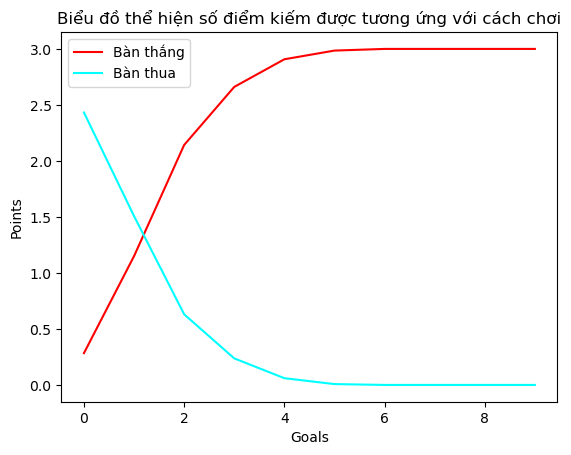

In [35]:
plt.plot(table_score_points['Bàn thắng'] , table_score_points['Điểm thắng'] , color='red', label='Bàn thắng')
plt.plot(table_score_points['Bàn thua'] , table_score_points['Điểm thua'] , color='cyan', label='Bàn thua')
plt.xlabel('Goals')
plt.ylabel('Points')
plt.title('Biểu đồ thể hiện số điểm kiếm được tương ứng với cách chơi')
plt.legend();
plt.show();

# Liệu trải qua các mùa giải , các đội vô địch sẽ phải đạt số điểm như thế nào

In [36]:
df_epl_champion = df_epl.copy()
df_epl_champion['Season'].value_counts()

1993-94    462
1994-95    462
2008-09    380
2020-21    380
2019-20    380
2018-19    380
2017-18    380
2016-17    380
2015-16    380
2014-15    380
2013-14    380
2012-13    380
2011-12    380
2010-11    380
2009-10    380
2007-08    380
2006-07    380
2005-06    380
2004-05    380
2003-04    380
2002-03    380
2001-02    380
2000-01    380
1999-00    380
1998-99    380
1997-98    380
1996-97    380
1995-96    380
2021-22    309
Name: Season, dtype: int64

In [37]:
# Chuyển về dạng mùa season (1993-94) sang dạng (1993-1994) để groupby cho dễ
def new_format_season(x):
    if x == '1999-00':
        return '1999-2000'
    x = str(x)
    index = x.find('-')
    new_x = x[:index+1] + x[:2] + x[index+1:]
    return new_x

In [38]:
for i in range(len(df_epl_champion['Season'])):
    df_epl_champion['Season'][i] = new_format_season(df_epl_champion['Season'][i])

In [39]:
df_epl_champion['Season'].value_counts()

1993-1994    462
1994-1995    462
2008-2009    380
2020-2021    380
2019-2020    380
2018-2019    380
2017-2018    380
2016-2017    380
2015-2016    380
2014-2015    380
2013-2014    380
2012-2013    380
2011-2012    380
2010-2011    380
2009-2010    380
2007-2008    380
2006-2007    380
2005-2006    380
2004-2005    380
2003-2004    380
2002-2003    380
2001-2002    380
2000-2001    380
1999-2000    380
1998-1999    380
1997-1998    380
1996-1997    380
1995-1996    380
2021-2022    309
Name: Season, dtype: int64

In [81]:
# List lưu thông tin các bảng xếp hạng qua từng mùa giải
table_champion = []
for i in range(1993,2022):
    season = "{}-{}".format(i,i+1)
    df_season_i = df_epl_champion[df_epl_champion['Season'].str.contains(season)]
    
    '''
        Tìm số bàn thắng và số bàn thua của từng đội bóng
    '''
    # sân nhà
    df_goalScore_home = df_season_i.groupby('HomeTeam')['FTHG'].sum().reset_index() # số bàn thắng
    df_goalAgain_home = df_season_i.groupby('HomeTeam')['FTAG'].sum().reset_index() # số bàn thua
    # sân khách
    df_goalScore_away = df_season_i.groupby('AwayTeam')['FTAG'].sum().reset_index() # số bàn thắng
    df_goalAgain_away = df_season_i.groupby('AwayTeam')['FTHG'].sum().reset_index() # số bàn thua
    # tổng số bàn ghi được:
    df_goals = pd.DataFrame(columns=['Tên đội bóng' , 'Số bàn thắng' , 'Số bàn thua' , 'Hiệu số'])
    df_goals['Tên đội bóng'] = df_goalScore_home['HomeTeam']
    df_goals['Số bàn thắng'] = df_goalScore_home['FTHG'] + df_goalScore_away['FTAG']
    df_goals['Số bàn thua'] = df_goalAgain_home['FTAG'] + df_goalAgain_away['FTHG']
    df_goals['Hiệu số'] = df_goals['Số bàn thắng'] - df_goals['Số bàn thua']

    '''
        Tính số trận thắng , số trận thua và số điểm mà mỗi đội đạt được
    '''
    # sân nhà
    df_result_home = df_season_i.groupby('HomeTeam')['FTR'].value_counts().unstack(fill_value = 0).reset_index()
    df_result_home['points_home'] = df_result_home['H'] * 3 + df_result_home['D']
    # sân khách
    df_result_away = df_season_i.groupby('AwayTeam')['FTR'].value_counts().unstack(fill_value = 0).reset_index()
    df_result_away['points_away'] = df_result_away['A'] * 3 + df_result_away['D']
    # tổng số điểm kiếm được
    df_res_points = pd.DataFrame(columns=['Số trận thắng' , 'Số trận hòa' , 'Số trận thua' , 'Tổng điểm'])
    df_res_points['Số trận thắng'] = df_result_home['H'] + df_result_away['A']
    df_res_points['Số trận hòa'] = df_result_home['D'] + df_result_away['D']
    df_res_points['Số trận thua'] = df_result_home['A'] + df_result_away['H']
    df_res_points['Tổng điểm'] = df_res_points['Số trận thắng'] * 3 + df_res_points['Số trận hòa']

    # tạo ra bảng xếp hạng
    df_bxh = pd.concat([df_goals,df_res_points],axis=1)
    df_bxh['Mùa giải'] = season
    df_bxh = df_bxh.reindex(columns=['Mùa giải' , 'Tên đội bóng' , 'Số trận thắng' , 'Số trận hòa' , 'Số trận thua' , 'Số bàn thắng' , 'Số bàn thua' , 'Hiệu số' , 'Tổng điểm'])
    df_bxh = df_bxh.sort_values('Tổng điểm' , ascending=False).reset_index(drop=True)
    df_bxh.index += 1
    
    
    '''
        Đưa các bxh của từng mùa vào table
    '''
    table_champion.append(df_bxh)

# Số điểm mà các đội vô địch đạt được qua các mùa giải

In [112]:
arr_points = []
arr_season = []
for i in range(len(table_champion)):
    arr_points.append(max(table_champion[i]['Tổng điểm']))
    a = list(set(table_champion[i]['Mùa giải']))
    arr_season.append(a[0])
arr_season 

['1993-1994',
 '1994-1995',
 '1995-1996',
 '1996-1997',
 '1997-1998',
 '1998-1999',
 '1999-2000',
 '2000-2001',
 '2001-2002',
 '2002-2003',
 '2003-2004',
 '2004-2005',
 '2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019',
 '2019-2020',
 '2020-2021',
 '2021-2022']

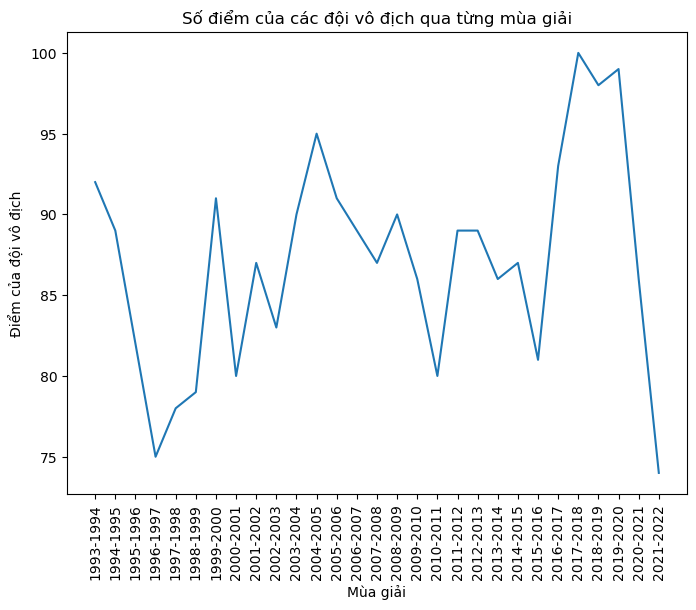

In [113]:
fig = plt.figure(figsize=(8,6))
plt.plot(arr_season,arr_points)
plt.xlabel('Mùa giải')
plt.ylabel('Điểm của đội vô địch')
plt.title('Số điểm của các đội vô địch qua từng mùa giải')
plt.xticks(rotation=90)
plt.show();

# Tìm ra sự ảnh hưởng của các HLV